In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
data_path = os.path.join(os.getcwd(),'dataset','Cancerdata.txt')
cancer = pd.read_csv(data_path, sep='\t')
cancer.set_axis(['index','logCancerVol', 'logCancerWeight','age','logBenighHP','svi','logCP','gleasonScore','gleasonS45','levelCancerAntigen', 'train'], axis=1)
cancer = cancer.replace('?', np.nan)
cancer = cancer.dropna()
cancer = cancer.drop(['index'], axis=1)


In [4]:
# Your code goes here
print('Number of samples: {}, number of attributes: {}'.format(cancer.shape[0], cancer.shape[1]))

Number of samples: 97, number of attributes: 10


In [5]:
cancer['train'].value_counts()

T    67
F    30
Name: train, dtype: int64

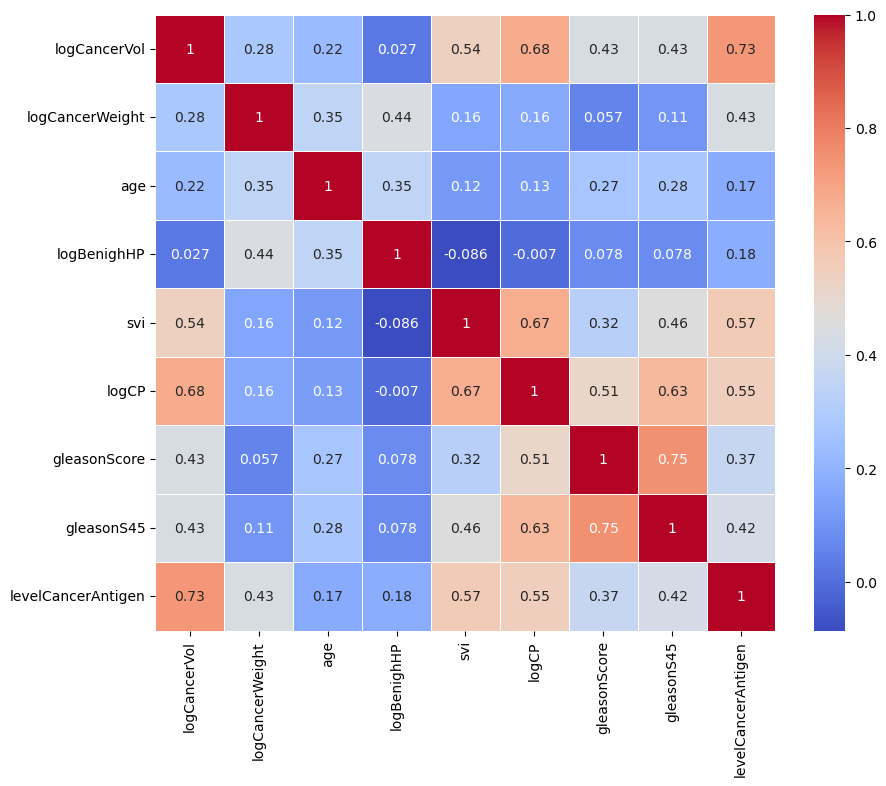

In [6]:

import matplotlib.pyplot as plt
# Selected columns for pair plots
selected_columns = ['logCancerVol', 'logCancerWeight', 'age', 'logBenighHP', 'svi', 'logCP', 'gleasonScore', 'gleasonS45', 'levelCancerAntigen']
correlation_matrix = cancer[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

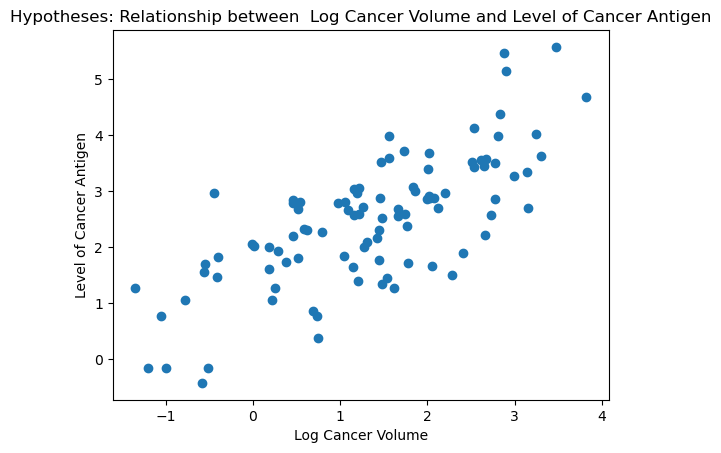

In [7]:
plt.scatter(cancer['logCancerVol'], cancer['levelCancerAntigen'])
plt.xlabel('Log Cancer Volume')
plt.ylabel('Level of Cancer Antigen')
plt.title('Hypotheses: Relationship between  Log Cancer Volume and Level of Cancer Antigen')
plt.show()


In [14]:
# Splitting the data based on the 'train' column
X_train, X_test = cancer[cancer['train'] == 'T'], cancer[cancer['train'] == 'F']

# Splitting the data into X and y
y_train, y_test = X_train.pop('levelCancerAntigen').values, X_test.pop('levelCancerAntigen').values

X_train, X_test = X_train.drop('train', axis=1), X_test.drop('train', axis=1)

print('X_train shape: {}, y_train shape: {}'.format(X_train.shape, y_train.shape))


X_train shape: (67, 8), y_train shape: (67,)


In [17]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
X_train_standardized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_standardized = scaler.transform(X_test)



# Display the first few rows of the standardized training data
print("Standardized Training Data:")
print(pd.DataFrame(X_train_standardized, columns=X_train.columns).head())

# Display the first few rows of the standardized test data
print("\nStandardized Test Data:")
print(pd.DataFrame(X_test_standardized, columns=X_test.columns).head())


Standardized Training Data:
   logCancerVol  logCancerWeight       age  logBenighHP       svi     logCP  \
0     -1.535180        -1.810979 -1.980425    -1.003472 -0.537086 -0.843084   
1     -1.871221        -0.647911 -0.906025    -1.003472 -0.537086 -0.843084   
2     -1.479237        -1.976330  1.242777    -1.003472 -0.537086 -0.843084   
3     -2.041272        -0.725785 -0.906025    -1.003472 -0.537086 -0.843084   
4     -0.455756        -0.409561 -0.368824    -1.003472 -0.537086 -0.843084   

   gleasonScore  gleasonS45  
0     -1.039499   -0.903253  
1     -1.039499   -0.903253  
2      0.381857   -0.215549  
3     -1.039499   -0.903253  
4     -1.039499   -0.903253  

Standardized Test Data:
   logCancerVol  logCancerWeight       age  logBenighHP       svi     logCP  \
0     -0.467312        -0.322579 -0.100224     0.374302 -0.537086 -0.843084   
1     -1.694681        -0.183072 -2.383326    -1.003472 -0.537086 -0.843084   
2     -0.884102        -0.806636 -0.234524    -1.003472

In [18]:
print('Number of instances in X_train: {}'.format(X_train_standardized.shape[0]))
print('Number of instances in X_test: {}'.format(X_test_standardized.shape[0]))
print('Number of instances in X_train and X_test together: {}'.format(X_train_standardized.shape[0] + X_test_standardized.shape[0]))


Number of instances in X_train: 67
Number of instances in X_test: 30
Number of instances in X_train and X_test together: 97


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and fit the model
lm = LinearRegression().fit(X_train_standardized, y_train)

# Display training accuracy, coefficients, and intercept
print(f'Training accuracy (R-squared): {lm.score(X_train_standardized, y_train):.3f}')
print(f'Coefficients: {lm.coef_}')
print(f'Intercept: {lm.intercept_:.3f}')

# Calculate and display MSE for training and test data
print(f'Training MSE: {mean_squared_error(y_train, lm.predict(X_train_standardized)):.3f}')
print(f'Test MSE: {mean_squared_error(y_test, lm.predict(X_test_standardized)):.3f}')


Training accuracy (R-squared): 0.694
Coefficients: [ 0.71104059  0.29045029 -0.14148182  0.21041951  0.30730025 -0.28684075
 -0.02075686  0.27526843]
Intercept: 2.452
Training MSE: 0.439
Test MSE: 0.521


In [22]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# initialise the ridge  and fit the model
ridge_regression = Ridge(alpha=10, random_state=42)


ridge_regression.fit(X_train_standardized, y_train)

# Predict on the test data
y_test_pred = ridge_regression.predict(X_test_standardized)

# Calculate MSE and R-squared
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f'MSE: {mse_test:.3f}')
print(f'R-squared: {r2_test:.3f}')
print(f'Ridge Regression Coefficients: {ridge_regression.coef_}')
print(f'Ridge Regression Intercept: {ridge_regression.intercept_}')

MSE: 0.488
R-squared: 0.535
Ridge Regression Coefficients: [ 0.53829234  0.27551116 -0.08631749  0.19054586  0.26536863 -0.08867204
  0.02689535  0.17127474]
Ridge Regression Intercept: 2.4523450850746262


In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge

def cross_validate(model, X_train_standardized, y_train, n_folds=5, random_seed=42):
    mse_scores = []
    r2_scores = []

    num_samples = len(X_train_standardized)
    fold_size = num_samples // n_folds
    shuffled_indices = np.arange(num_samples)
    
    np.random.seed(random_seed)
    np.random.shuffle(shuffled_indices)

    for fold in range(n_folds):
        fold_start = fold * fold_size
        fold_end = (fold + 1) * fold_size
        if fold == n_folds - 1:
            fold_end = num_samples
        test_indices = shuffled_indices[fold_start:fold_end]
        train_indices = np.concatenate([shuffled_indices[:fold_start], shuffled_indices[fold_end:]])
        X_train_fold = X_train_standardized[train_indices]
        y_train_fold = y_train[train_indices]
        X_test_fold = X_train_standardized[test_indices]
        y_test_fold = y_train[test_indices]
        
        model.fit(X_train_fold, y_train_fold)
        y_test_pred_fold = model.predict(X_test_fold)
        
        mse_scores.append(mean_squared_error(y_test_fold, y_test_pred_fold))
        r2_scores.append(r2_score(y_test_fold, y_test_pred_fold))

    return mse_scores, r2_scores

# Cross validate using LSE
lse_model = LinearRegression()
mse_scores_lse, r2_scores_lse = cross_validate(lse_model, X_train_standardized, y_train)
print ('LSE MSE scores: {}'.format(mse_scores_lse))
print('LSE Average MSE: {:.3f}'.format(np.mean(mse_scores_lse)))
print('LSE Average R-squared: {:.3f}'.format(np.mean(r2_scores_lse)))
print('LSE Coefficients: {}'.format(lse_model.coef_))
print('LSE Intercept: {}'.format(lse_model.intercept_))

# Cross validate using Ridge
ridge_regression = Ridge(alpha=1.0, random_state=42)
mse_scores_ridge, r2_scores_ridge = cross_validate(ridge_regression, X_train_standardized, y_train)
print ('\nRidge MSE scores: {}'.format(mse_scores_ridge))
print('Ridge Average MSE: {:.3f}'.format(np.mean(mse_scores_ridge)))
print('Ridge Average R-squared: {:.3f}'.format(np.mean(r2_scores_ridge)))
print('Ridge Coefficients: {}'.format(ridge_regression.coef_))
print('Ridge Intercept: {}'.format(ridge_regression.intercept_))


LSE MSE scores: [0.5347101512142495, 0.5767528923049768, 1.4562512913406376, 0.23165604364776463, 0.23751250298219206]
LSE Average MSE: 0.607
LSE Average R-squared: 0.603
LSE Coefficients: [ 0.74249084  0.25841238 -0.08982983  0.20108662  0.28377145 -0.30944107
 -0.08432282  0.35367752]
LSE Intercept: 2.460216950325387

Ridge MSE scores: [0.5046949926724701, 0.5752429485352951, 1.4451247598463992, 0.24156347359004485, 0.23170924799872897]
Ridge Average MSE: 0.600
Ridge Average R-squared: 0.609
Ridge Coefficients: [ 0.70768413  0.26074844 -0.08437651  0.19617178  0.28066794 -0.26739624
 -0.06663928  0.32507367]
Ridge Intercept: 2.4570976290486684


In [33]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

ridge_regression = Ridge(alpha=1.0, random_state=42)
n_folds = 5
mse_scores = []
r2_scores = []



# Validation function

num_samples = len(X_train_standardized)
fold_size = num_samples // n_folds
shuffled_indices = np.arange(num_samples)

# Use a fixed random seed for shuffling
random_seed = 42
np.random.seed(random_seed)
np.random.shuffle(shuffled_indices)

for fold in range(n_folds):
    fold_start = fold * fold_size
    fold_end = (fold + 1) * fold_size
    if fold == n_folds - 1:
        fold_end = num_samples
    test_indices = shuffled_indices[fold_start:fold_end]
    train_indices = np.concatenate([shuffled_indices[:fold_start], shuffled_indices[fold_end:]])
    X_train_fold = X_train_standardized.values[train_indices]
    y_train_fold = y_train[train_indices]
    X_test_fold = X_train_standardized.values[test_indices]
    y_test_fold = y_train[test_indices]
    ridge_regression.fit(X_train_fold, y_train_fold)
    y_test_pred_fold = ridge_regression.predict(X_test_fold)
    mse_scores.append(mean_squared_error(y_test_fold, y_test_pred_fold))
    r2_scores.append(r2_score(y_test_fold, y_test_pred_fold))

print ('MSE scores: {}'.format(mse_scores))
print('Average MSE: {:.3f}'.format(np.mean(mse_scores)))
print('Average R-squared: {:.3f}'.format(np.mean(r2_scores)))
print('Ridge Regression Coefficients: {}'.format(ridge_regression.coef_))
print('Ridge Regression Intercept: {}'.format(ridge_regression.intercept_))


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

# Cross validate using LSE
lse_model = LinearRegression()
mse_scores_lse, r2_scores_lse = cross_validate(lse_model, X_train_standardized, y_train)
print ('LSE MSE scores: {}'.format(mse_scores_lse))
print('LSE Average MSE: {:.3f}'.format(np.mean(mse_scores_lse)))
print('LSE Average R-squared: {:.3f}'.format(np.mean(r2_scores_lse)))
print('LSE Coefficients: {}'.format(lse_model.coef_))
print('LSE Intercept: {}'.format(lse_model.intercept_))

# Using RidgeCV for cross-validation with Ridge regression
alphas = np.logspace(-6, 6, 13) # You can adjust these values based on your data and needs
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train_standardized, y_train)

# Print the results
print('\nRidgeCV')
print('Best alpha:', ridge_cv.alpha_)
mse_scores_ridge = ridge_cv.cv_values_.mean(axis=0)
print('MSE scores for different alphas:', mse_scores_ridge)
print('Average MSE for best alpha: {:.3f}'.format(mse_scores_ridge[np.argmin(mse_scores_ridge)]))
print('Ridge Coefficients:', ridge_cv.coef_)
print('Ridge Intercept:', ridge_cv.intercept_)

LSE MSE scores: [0.5347101512142495, 0.5767528923049768, 1.4562512913406376, 0.23165604364776463, 0.23751250298219206]
LSE Average MSE: 0.607
LSE Average R-squared: 0.603
LSE Coefficients: [ 0.74249084  0.25841238 -0.08982983  0.20108662  0.28377145 -0.30944107
 -0.08432282  0.35367752]
LSE Intercept: 2.460216950325387

RidgeCV
Best alpha: 1.0
MSE scores for different alphas: [0.58395523 0.58395518 0.58395469 0.58394982 0.58390121 0.58342797
 0.57980279 0.58389983 0.74503589 1.23693632 1.44977003 1.47771179
 1.48059194]
Average MSE for best alpha: 0.580
Ridge Coefficients: [ 0.68540969  0.28959545 -0.13430643  0.20841057  0.30162494 -0.25453234
 -0.0112517   0.25598543]
Ridge Intercept: 2.4523450850746262


/Users/dolorious/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
